参考
https://mpb.readthedocs.io/en/latest/Python_Data_Analysis_Tutorial/

In [2]:
import math
import meep as mp
from meep import mpb

import numpy as np
import matplotlib.pyplot as plt


In [10]:
#屈折率
n_Air = 1
n_Si = 2.6

#計算する固有周波数の数
num_bands = 4

#メッシュの細かさ
resolution = 32

#Γ-K, K-M, M-Γ間の点の個数
num_of_kpoint = 30

#単位格子
geometry_lattice = mp.Lattice(size=mp.Vector3(1, 1),
                              basis1=mp.Vector3(1./2, np.sqrt(3)/2),
                              basis2=mp.Vector3(1./2, -np.sqrt(3)/2))

#構造
#default_material = mp.Medium(epsilon=n_Si**2)
geometry = [
    mp.Block(material=mp.Medium(epsilon=n_Si**2),
             size=mp.Vector3(mp.inf, mp.inf)),
    mp.Cylinder(0.25, material=mp.Medium(epsilon=n_Air**2))
]

#ブリルアンゾーン
k_points = [
    mp.Vector3(),               # Gamma
    mp.Vector3(1./3, 1./3),    # K
    mp.Vector3(1./2, 0),          # M
    mp.Vector3(),               # Gamma
]
k_points = mp.interpolate(num_of_kpoint, k_points)

In [11]:
#計算
ms = mpb.ModeSolver(
    geometry=geometry,
    geometry_lattice=geometry_lattice,
    k_points=k_points,
    resolution=resolution,
    num_bands=num_bands
)

ms.run_tm(mpb.output_at_kpoint(mp.Vector3(1./3, 1./3),
                               mpb.fix_efield_phase,
                               mpb.output_efield_z))
tm_freqs = ms.all_freqs
tm_gaps = ms.gap_list
ms.run_te(mpb.output_at_kpoint(mp.Vector3(1./3, 1./3),
                               mpb.fix_efield_phase,
                               mpb.output_efield_z))
te_freqs = ms.all_freqs
te_gaps = ms.gap_list

Initializing eigensolver data
Computing 4 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 32 x 32 x 1.
Solving for 4 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (0.5, 0.866025, 0)
     (0.5, -0.866025, 0)
     (0, 0, 1)
Cell volume = 0.866025
Reciprocal lattice vectors (/ 2 pi):
     (1, 0.57735, -0)
     (1, -0.57735, 0)
     (-0, 0, 1)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1e+20,0)
          axes (1,0,0), (0,1,0), (0,0,1)
     cylinder, center = (0,0,0)
          radius 0.25, height 1e+20, axis (0, 0, 1)
Geometric object tree has depth 1 and 10 object nodes (vs. 2 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: tm.
Initializing fields to random numbers...
94 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.01075268817204301, 0.01075268817204301, 0.0>
  Vector3<0.02150537634408602, 0.02150537634408602, 0.0>
  Vector3<0.03225806451612903, 0.032258064516

tmfreqs:, 11, 0.107527, 0.107527, 0, 0.215054, 0.0918381, 0.3845, 0.424676, 0.485417
elapsed time for k point: 0.015542984008789062
solve_kpoint (0.11828,0.11828,0):
Solving for bands 1 to 4...
Finished solving for bands 1 to 4 after 6 iterations.
tmfreqs:, 12, 0.11828, 0.11828, 0, 0.236559, 0.100962, 0.377946, 0.419676, 0.487653
elapsed time for k point: 0.016100645065307617
solve_kpoint (0.129032,0.129032,0):
Solving for bands 1 to 4...
Finished solving for bands 1 to 4 after 6 iterations.
tmfreqs:, 13, 0.129032, 0.129032, 0, 0.258065, 0.110066, 0.371428, 0.414464, 0.489907
elapsed time for k point: 0.015347003936767578
solve_kpoint (0.139785,0.139785,0):
Solving for bands 1 to 4...
Finished solving for bands 1 to 4 after 6 iterations.
tmfreqs:, 14, 0.139785, 0.139785, 0, 0.27957, 0.119149, 0.364956, 0.409081, 0.492209
elapsed time for k point: 0.015829801559448242
solve_kpoint (0.150538,0.150538,0):
Solving for bands 1 to 4...
Finished solving for bands 1 to 4 after 6 iterations.
tm

tmfreqs:, 42, 0.387097, 0.225806, 0, 0.619937, 0.246407, 0.270176, 0.343889, 0.51714
elapsed time for k point: 0.015393972396850586
solve_kpoint (0.392473,0.215054,0):
Solving for bands 1 to 4...
Finished solving for bands 1 to 4 after 4 iterations.
tmfreqs:, 43, 0.392473, 0.215054, 0, 0.616102, 0.244893, 0.269536, 0.347163, 0.513284
elapsed time for k point: 0.014880180358886719
solve_kpoint (0.397849,0.204301,0):
Solving for bands 1 to 4...
Finished solving for bands 1 to 4 after 4 iterations.
tmfreqs:, 44, 0.397849, 0.204301, 0, 0.612431, 0.243444, 0.26882, 0.350567, 0.5094
elapsed time for k point: 0.014868736267089844
solve_kpoint (0.403226,0.193548,0):
Solving for bands 1 to 4...
Finished solving for bands 1 to 4 after 4 iterations.
tmfreqs:, 45, 0.403226, 0.193548, 0, 0.608929, 0.242061, 0.268054, 0.354076, 0.505496
elapsed time for k point: 0.016060829162597656
solve_kpoint (0.408602,0.182796,0):
Solving for bands 1 to 4...
Finished solving for bands 1 to 4 after 4 iterations.


Solving for bands 1 to 4...
Finished solving for bands 1 to 4 after 5 iterations.
tmfreqs:, 76, 0.290323, 0, 0, 0.335236, 0.142531, 0.339464, 0.421781, 0.45849
elapsed time for k point: 0.01795506477355957
solve_kpoint (0.274194,0,0):
Solving for bands 1 to 4...
Finished solving for bands 1 to 4 after 5 iterations.
tmfreqs:, 77, 0.274194, 0, 0, 0.316611, 0.134731, 0.346234, 0.423415, 0.460175
elapsed time for k point: 0.01573777198791504
solve_kpoint (0.258065,0,0):
Solving for bands 1 to 4...
Finished solving for bands 1 to 4 after 5 iterations.
tmfreqs:, 78, 0.258065, 0, 0, 0.297987, 0.126907, 0.352943, 0.425147, 0.461912
elapsed time for k point: 0.015281438827514648
solve_kpoint (0.241935,0,0):
Solving for bands 1 to 4...
Finished solving for bands 1 to 4 after 5 iterations.
tmfreqs:, 79, 0.241935, 0, 0, 0.279363, 0.119061, 0.359585, 0.42697, 0.463674
elapsed time for k point: 0.016150236129760742
solve_kpoint (0.225806,0,0):
Solving for bands 1 to 4...
Finished solving for bands 1

  Vector3<0.467741935483871, 0.06451612903225806, 0.0>
  Vector3<0.4731182795698925, 0.05376344086021506, 0.0>
  Vector3<0.478494623655914, 0.04301075268817206, 0.0>
  Vector3<0.4838709677419355, 0.03225806451612906, 0.0>
  Vector3<0.489247311827957, 0.021505376344086002, 0.0>
  Vector3<0.4946236559139785, 0.010752688172043001, 0.0>
  Vector3<0.5, 0.0, 0.0>
  Vector3<0.4838709677419355, 0.0, 0.0>
  Vector3<0.467741935483871, 0.0, 0.0>
  Vector3<0.45161290322580644, 0.0, 0.0>
  Vector3<0.43548387096774194, 0.0, 0.0>
  Vector3<0.41935483870967744, 0.0, 0.0>
  Vector3<0.4032258064516129, 0.0, 0.0>
  Vector3<0.3870967741935484, 0.0, 0.0>
  Vector3<0.3709677419354839, 0.0, 0.0>
  Vector3<0.3548387096774194, 0.0, 0.0>
  Vector3<0.33870967741935487, 0.0, 0.0>
  Vector3<0.3225806451612903, 0.0, 0.0>
  Vector3<0.3064516129032258, 0.0, 0.0>
  Vector3<0.2903225806451613, 0.0, 0.0>
  Vector3<0.27419354838709675, 0.0, 0.0>
  Vector3<0.25806451612903225, 0.0, 0.0>
  Vector3<0.24193548387096775, 0.0,

Finished solving for bands 1 to 4 after 7 iterations.
tefreqs:, 27, 0.27957, 0.27957, 0, 0.55914, 0.24395, 0.333944, 0.345064, 0.548735
elapsed time for k point: 0.021143436431884766
solve_kpoint (0.290323,0.290323,0):
Solving for bands 1 to 4...
Finished solving for bands 1 to 4 after 7 iterations.
tefreqs:, 28, 0.290323, 0.290323, 0, 0.580645, 0.250936, 0.329455, 0.341122, 0.551793
elapsed time for k point: 0.022077322006225586
solve_kpoint (0.301075,0.301075,0):
Solving for bands 1 to 4...
Finished solving for bands 1 to 4 after 7 iterations.
tefreqs:, 29, 0.301075, 0.301075, 0, 0.602151, 0.256915, 0.326118, 0.337322, 0.554619
elapsed time for k point: 0.01601386070251465
solve_kpoint (0.311828,0.311828,0):
Solving for bands 1 to 4...
Finished solving for bands 1 to 4 after 7 iterations.
tefreqs:, 30, 0.311828, 0.311828, 0, 0.623656, 0.261494, 0.324339, 0.333671, 0.557039
elapsed time for k point: 0.017750263214111328
solve_kpoint (0.322581,0.322581,0):
Solving for bands 1 to 4...
F

Finished solving for bands 1 to 4 after 5 iterations.
tefreqs:, 58, 0.473118, 0.0537634, 0, 0.579848, 0.233718, 0.301052, 0.417307, 0.48522
elapsed time for k point: 0.015773773193359375
solve_kpoint (0.478495,0.0430108,0):
Solving for bands 1 to 4...
Finished solving for bands 1 to 4 after 4 iterations.
tefreqs:, 59, 0.478495, 0.0430108, 0, 0.57895, 0.23324, 0.300791, 0.419886, 0.482724
elapsed time for k point: 0.014522790908813477
solve_kpoint (0.483871,0.0322581,0):
Solving for bands 1 to 4...
Finished solving for bands 1 to 4 after 4 iterations.
tefreqs:, 60, 0.483871, 0.0322581, 0, 0.578251, 0.232867, 0.300589, 0.422048, 0.480628
elapsed time for k point: 0.013648033142089844
solve_kpoint (0.489247,0.0215054,0):
Solving for bands 1 to 4...
Finished solving for bands 1 to 4 after 4 iterations.
tefreqs:, 61, 0.489247, 0.0215054, 0, 0.577751, 0.2326, 0.300444, 0.423693, 0.479029
elapsed time for k point: 0.014571666717529297
solve_kpoint (0.494624,0.0107527,0):
Solving for bands 1 t

tefreqs:, 92, 0.0322581, 0, 0, 0.0372484, 0.0169795, 0.457419, 0.496249, 0.4981
elapsed time for k point: 0.061174869537353516
solve_kpoint (0.016129,0,0):
Solving for bands 1 to 4...
Finished solving for bands 1 to 4 after 80 iterations.
tefreqs:, 93, 0.016129, 0, 0, 0.0186242, 0.00849037, 0.459023, 0.496431, 0.497087
elapsed time for k point: 0.12581586837768555
solve_kpoint (0,0,0):
Solving for bands 2 to 4...
Finished solving for bands 2 to 4 after 12 iterations.
tefreqs:, 94, 0, 0, 0, 0, 0, 0.459588, 0.496461, 0.496631
elapsed time for k point: 0.017215490341186523
Band 1 range: 0.0 at Vector3<0.0, 0.0, 0.0> to 0.2652101963575257 at Vector3<0.3333333333333333, 0.3333333333333333, 0.0>
Band 2 range: 0.3003283861210221 at Vector3<0.5, 0.0, 0.0> to 0.4595875579048694 at Vector3<0.0, 0.0, 0.0>
Band 3 range: 0.32684546203585424 at Vector3<0.3333333333333333, 0.3333333333333333, 0.0> to 0.4964607347102881 at Vector3<0.0, 0.0, 0.0>
Band 4 range: 0.47767502754216584 at Vector3<0.5, 0.0, 0

In [26]:
md = mpb.MPBData(rectify=True, periods=3, resolution=64)
eps = ms.get_epsilon()
converted_eps = md.convert(eps)
converted_eps.shape

epsilon: 1-6.76, mean 5.45406, harm. mean 3.06613, 80.957% > 1, 77.3275% "fill"


(192, 166)

In [27]:
import csv
with open('epsilon_distribution.csv', 'wt') as f:
    writer = csv.writer(f)
    writer.writerows(converted_eps)

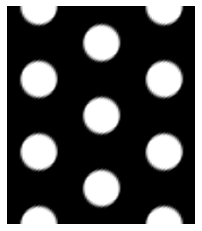

In [28]:
plt.imshow(converted_eps, interpolation='spline36', cmap="binary")
plt.axis('off')
plt.show()

In [29]:
tm_freqs.max()

0.5500301564452101

Initializing eigensolver data
Computing 4 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 32 x 32 x 1.
Solving for 4 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (0.5, 0.866025, 0)
     (0.5, -0.866025, 0)
     (0, 0, 1)
Cell volume = 0.866025
Reciprocal lattice vectors (/ 2 pi):
     (1, 0.57735, -0)
     (1, -0.57735, 0)
     (-0, 0, 1)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1e+20,0)
          axes (1,0,0), (0,1,0), (0,0,1)
     cylinder, center = (0,0,0)
          radius 0.25, height 1e+20, axis (0, 0, 1)
Geometric object tree has depth 1 and 10 object nodes (vs. 2 actual objects)
Initializing epsilon function...
Solving for band polarization: te.
Initializing fields to random numbers...
16 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.1, 0.0, 0.0>
  Vector3<0.2, 0.0, 0.0>
  Vector3<0.30000000000000004, 0.0, 0.0>
  Vector3<0.4, 0.0, 0.0>
  Vector3<0.5, 0.0, 0.0>
  Vector3<0.4666666666666667, 0.0666666

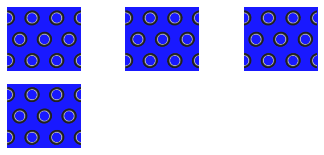

In [31]:
efields = []

def get_efields(ms, band):
    efields.append(ms.get_efield(band, bloch_phase=True))

ms.run_te(mpb.output_at_kpoint(mp.Vector3(1/3, 1/3), mpb.fix_efield_phase,
          get_efields))

# Create an MPBData instance to transform the efields
md = mpb.MPBData(rectify=True, resolution=64, periods=3)

converted = []
for f in efields:
    # Get just the z component of the efields
    f = f[..., 0, 2]
    converted.append(md.convert(f))

for i, f in enumerate(converted):
    plt.subplot(331 + i)
    plt.contour(converted_eps.T, cmap='binary')
    plt.imshow(np.real(f).T, interpolation='spline36', cmap='bwr', alpha=0.9)
    plt.axis('off')

plt.show()

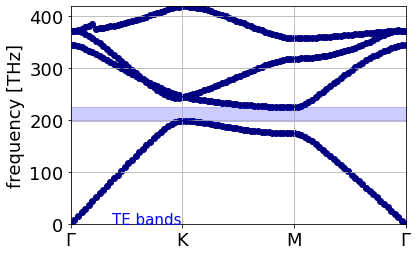

In [13]:
#THz表示
a = 400
c_const = 299792458

fontsize = 18
te_freqs_THz = np.array(te_freqs) * c_const/(a*10**3)
te_gaps_THz = np.array(te_gaps) * c_const/(a*10**3)
#print(te_freqs_THz)

fig, ax = plt.subplots()

x = range(len(te_freqs))

for xz, tez in zip(x, te_freqs_THz):
    ax.scatter([xz]*len(tez), tez, color='navy')

ax.plot(te_freqs_THz, color='navy')
ax.set_ylim([te_freqs_THz.min(), te_freqs_THz.max()])
ax.set_xlim([x[0], x[-1]])

for gap in te_gaps_THz:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='blue', alpha=0.2)

ax.text(11.5, 0, 'TE bands', color='blue', size=15)

points_in_between = (len(te_freqs) - 4) / 3
tick_locs = [i*points_in_between+i for i in range(4)]
tick_labs = ['Γ', 'K', 'M', 'Γ']
ax.set_xticks(tick_locs)
ax.set_xticklabels(tick_labs, size=fontsize)
ax.set_ylabel('frequency [THz]', size=fontsize)
plt.tick_params(labelsize=fontsize)
ax.grid(True)

plt.show()

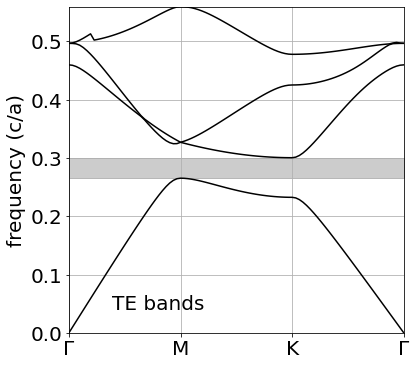

In [12]:
fs = 20

fig, ax = plt.subplots(figsize=(6,6))

x = range(len(te_freqs))

#ax.plot(tm_freqs, color='gray')
ax.plot(te_freqs, color='black')
ax.set_ylim([te_freqs.min(), te_freqs.max()])
ax.set_xlim([x[0], x[-1]])

# Plot gaps
for gap in te_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='black', alpha=0.2)

#for gap in te_gaps:
#    if gap[0] > 1:
#        ax.fill_between(x, gap[1], gap[2], color='red', alpha=0.2)


# Plot labels
ax.text(12, 0.04, 'TE bands', color='black', size=fs)
#ax.text(13.05, 0.235, 'TE bands', color='red', size=15)

points_in_between = (len(te_freqs) - 4) / 3
tick_locs = [i*points_in_between+i for i in range(4)]
tick_labs = ['Γ', 'K', 'M', 'Γ']
ax.set_xticks(tick_locs)
ax.set_xticklabels(tick_labs, size=fs)
ax.set_ylabel('frequency (c/a)', size=fs)
ax.grid(True)
plt.tick_params(labelsize=fs)
plt.savefig("2D_pillar_honeycomb_π_6_normFreq.png", bbox_inches="tight")

plt.show()